<a href="https://colab.research.google.com/github/kyniaz/Trabalho-AM-2/blob/main/Colab_AM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

files.upload()

import pandas as pd

dados = pd.read_csv('gt_2015.csv')

dados.head

Saving gt_2015.csv to gt_2015.csv


<bound method NDFrame.head of            AT      AP      AH    AFDP  ...     TEY     CDP       CO      NOX
0     1.95320  1020.1  84.985  2.5304  ...  116.27  10.799   7.4491  113.250
1     1.21910  1020.1  87.523  2.3937  ...  109.18  10.347   6.4684  112.020
2     0.94915  1022.2  78.335  2.7789  ...  125.88  11.256   3.6335   88.147
3     1.00750  1021.7  76.942  2.8170  ...  132.21  11.702   3.1972   87.078
4     1.28580  1021.6  76.732  2.8377  ...  133.58  11.737   2.3833   82.515
...       ...     ...     ...     ...  ...     ...     ...      ...      ...
7379  3.62680  1028.5  93.200  3.1661  ...  109.08  10.411  10.9930   89.172
7380  4.16740  1028.6  94.036  3.1923  ...  108.79  10.344  11.1440   88.849
7381  5.48200  1028.5  95.219  3.3128  ...  107.81  10.462  11.4140   96.147
7382  5.88370  1028.7  94.200  3.9831  ...  131.41  11.771   3.3134   64.738
7383  6.03920  1028.8  94.547  3.8752  ...  125.41  11.462  11.9810  109.240

[7384 rows x 11 columns]>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f28282f90>,
      dtype=object)

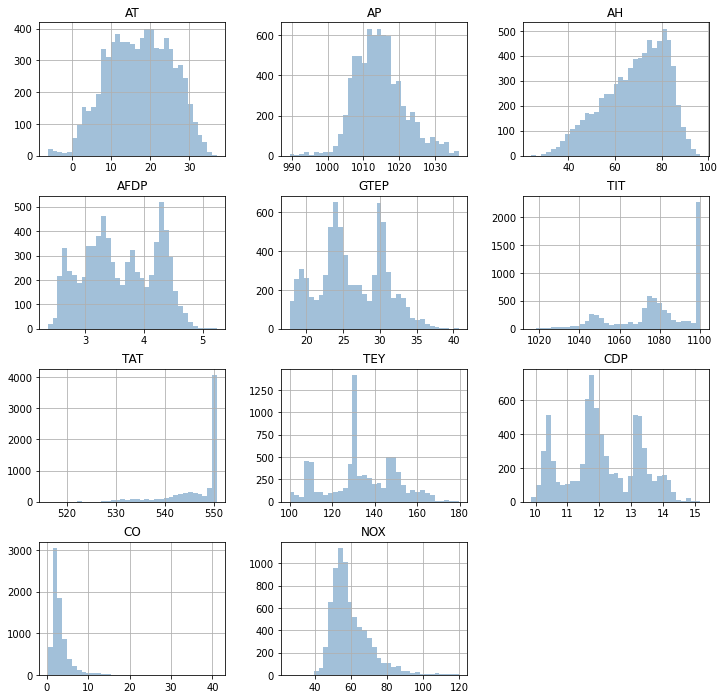

In [4]:
import numpy as np
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
from sklearn import metrics as sk_metrica
from scipy.spatial import distance_matrix


dados.hist(color='steelblue', alpha=0.5, bins=35, figsize=(12,12))

In [5]:
corr = dados.iloc[:,0:9].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
AT,1.00,-0.49,-0.47,0.47,0.19,0.33,0.21,0.11,0.20
AP,-0.49,1.00,0.08,-0.09,-0.04,-0.08,-0.29,0.05,0.03
AH,-0.47,0.08,1.00,-0.25,-0.30,-0.26,0.03,-0.18,-0.22
AFDP,0.47,-0.09,-0.25,1.00,0.84,0.92,-0.52,0.88,0.92
GTEP,0.19,-0.04,-0.30,0.84,1.00,0.89,-0.62,0.93,0.94
TIT,0.33,-0.08,-0.26,0.92,0.89,1.00,-0.40,0.95,0.95
TAT,0.21,-0.29,0.03,-0.52,-0.62,-0.40,1.00,-0.63,-0.66
TEY,0.11,0.05,-0.18,0.88,0.93,0.95,-0.63,1.00,0.99
CDP,0.20,0.03,-0.22,0.92,0.94,0.95,-0.66,0.99,1.00


## PCA

[5.43449332e-01 1.95947016e-01 9.57676498e-02 6.58146915e-02
 5.13427115e-02 2.45694273e-02 1.26742313e-02 7.32382952e-03
 2.91973845e-03 1.31135820e-04 6.02367812e-05]


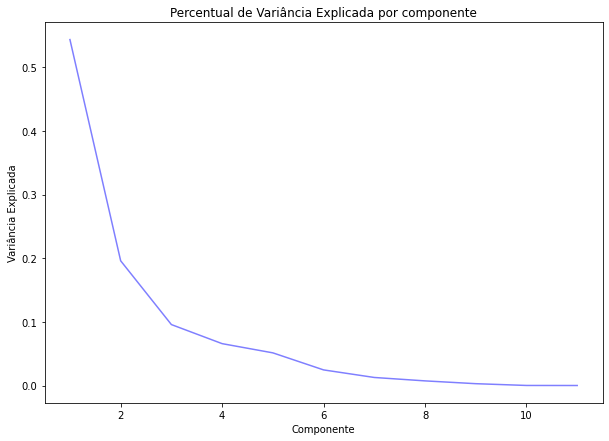

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dados)
X_scaled = scaler.transform(dados)

pca_todos = PCA()

pca_todos.fit(X_scaled)

#PCA()

print(pca_todos.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.title('Percentual de Variância Explicada por componente')
plt.plot(range(1,12), (pca_todos.explained_variance_ratio_),c='blue', alpha=0.5)
plt.xlabel('Componente')
plt.ylabel('Variância Explicada')
plt.show()

In [8]:
pca = PCA(n_components=2)

pca.fit(X_scaled)

PCA(n_components=2)

print(pca.explained_variance_ratio_)

[0.54344933 0.19594702]


In [9]:
dados_pca = pca.transform(X_scaled)

dados_pd_pca = pd.DataFrame(X_scaled)

dados_pd_pca = dados_pd_pca.iloc[:,0:2]

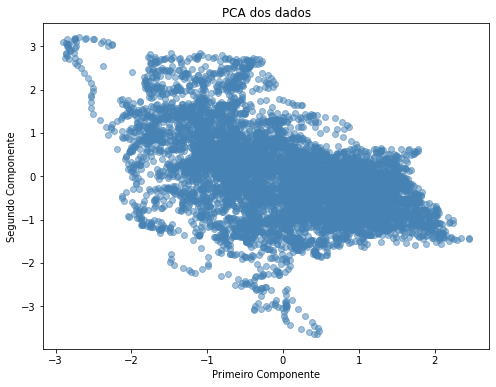

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c='steelblue', alpha=0.5)
plt.title('PCA dos dados')
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

# K Means

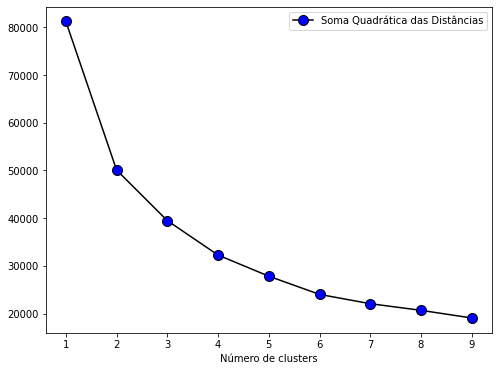

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#plt.figure()

ssd = [] 
for i in range(1,10): # variar número de grupos,
  globals()['kmeans_'+str(i)] = KMeans(n_clusters = i, random_state = 33).fit(X_scaled)
  ssd.append(globals()['kmeans_'+str(i)].inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot([i for i in range(1,10)], ssd, 'o-', markersize = 10, color = 'black',
         mfc = 'blue', label = 'Soma Quadrática das Distâncias')
ax.legend()
plt.xlabel('Número de clusters')
plt.show()

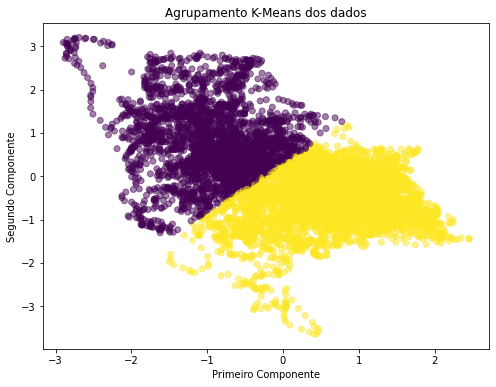

In [14]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(dados_pd_pca)

plt.figure(figsize=(8, 6))

plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=y_pred, alpha=0.5)
plt.title('Agrupamento K-Means dos dados')
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

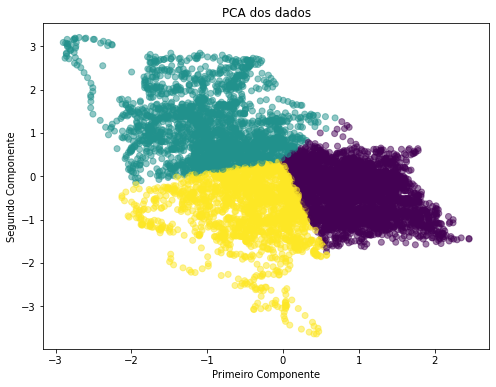

In [15]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(dados_pd_pca)

plt.figure(figsize=(8, 6))

plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=y_pred, alpha=0.5)
plt.title('PCA dos dados')
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

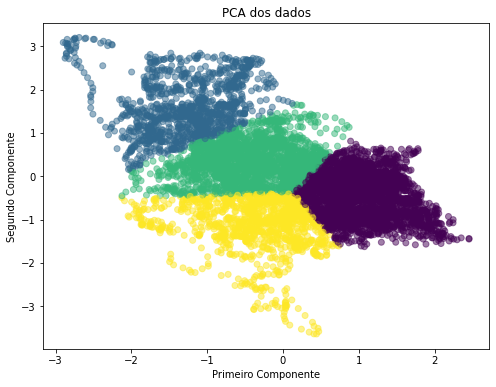

In [16]:
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(dados_pd_pca)

plt.figure(figsize=(8, 6))
plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=y_pred, alpha=0.5)
plt.title('PCA dos dados')
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

##Métricas de Validação

In [17]:
!pip install validclust

In [18]:
from validclust import dunn

#Matriz de distâncias
distancias = sk_metrica.pairwise_distances(dados_pd_pca)

print("Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz")

db = []
ch = []
dn = []
sil = []

for k in range(2,10):
  y_k_means = KMeans(n_clusters=k, random_state=42).fit_predict(dados_pd_pca)
  db.append(sk_metrica.davies_bouldin_score(dados_pd_pca, y_k_means))
  ch.append(sk_metrica.calinski_harabasz_score(dados_pd_pca, y_k_means))
  dn.append(dunn(distancias, y_k_means))
  sil.append(sk_metrica.silhouette_score(dados_pd_pca, y_k_means))


Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz


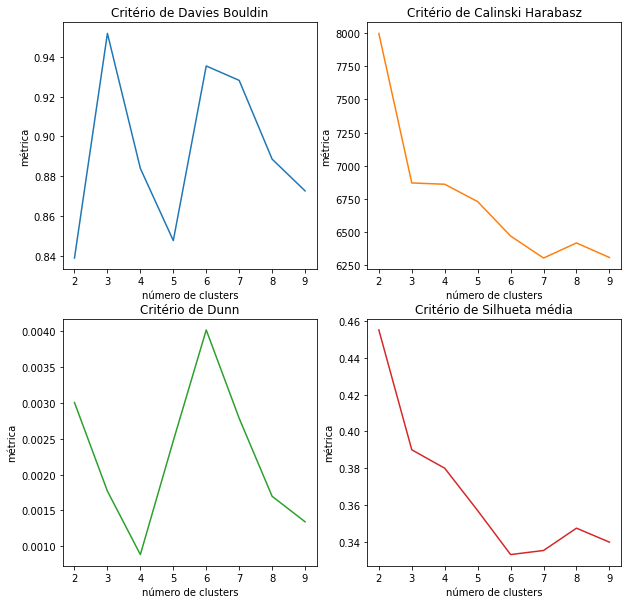

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

n_clust = [2,3,4,5,6,7,8,9]

axs[0, 0].plot(n_clust, db)
axs[0, 0].set_title('Critério de Davies Bouldin')
axs[0, 1].plot(n_clust, ch, 'tab:orange')
axs[0, 1].set_title('Critério de Calinski Harabasz')
axs[1, 0].plot(n_clust, dn, 'tab:green')
axs[1, 0].set_title('Critério de Dunn')
axs[1, 1].plot(n_clust, sil, 'tab:red')
axs[1, 1].set_title('Critério de Silhueta média')

for ax in axs.flat:
    ax.set(xlabel='número de clusters', ylabel='métrica')

#MÉTODO DE SINGLE

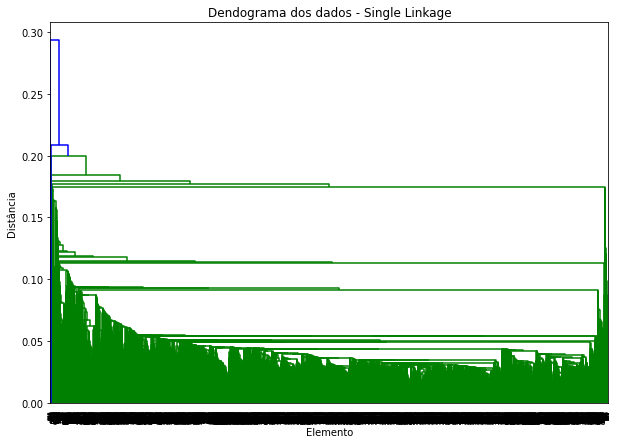

In [20]:
linked = linkage(dados_pd_pca, 'single')

plt.figure(figsize=(10, 7))
plt.title('Dendograma dos dados - Single Linkage')
plt.xlabel('Elemento')
plt.ylabel('Distância')
dendrogram(linked,
            orientation='top')
plt.show()


In [21]:
from scipy.cluster.hierarchy import fcluster

cluster_complete = fcluster(linked, 0.15, criterion='distance')

#print(cluster_complete)

unicos = np.unique(cluster_complete)
print(unicos)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


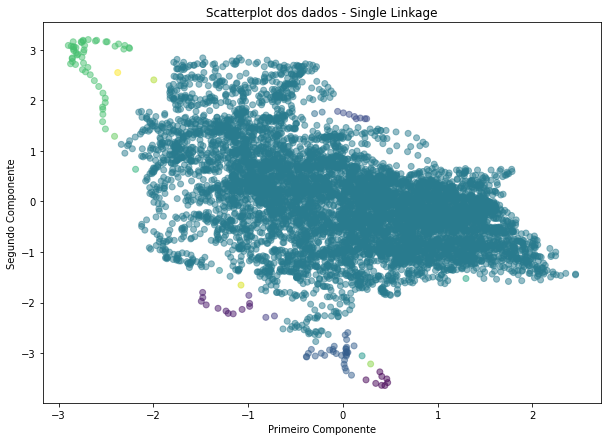

In [22]:
plt.figure(figsize=(10, 7))
plt.title('Scatterplot dos dados - Single Linkage')
plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=cluster_complete, alpha=0.5)
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()


# MÉTODO DE WARD

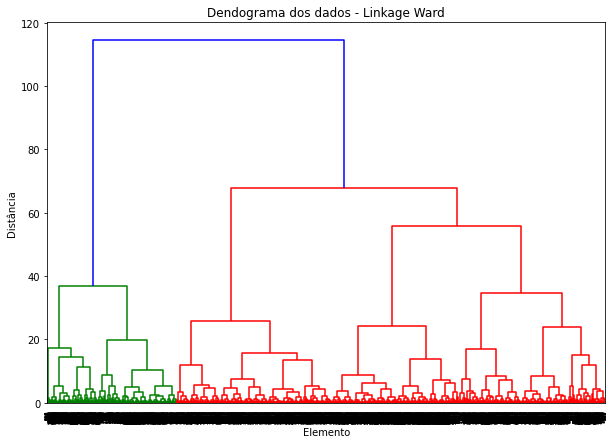

In [23]:
linked = linkage(dados_pd_pca, 'ward')

plt.figure(figsize=(10, 7))
plt.title('Dendograma dos dados - Linkage Ward')
plt.xlabel('Elemento')
plt.ylabel('Distância')
dendrogram(linked,
            orientation='top')
plt.show()

In [24]:
from scipy.cluster.hierarchy import fcluster

cluster_complete = fcluster(linked, 80, criterion='distance')

print(cluster_complete)

#verificando a quantidade de grupos para cada corte
unicos = np.unique(cluster_complete)

print(unicos)

[1 1 1 ... 1 1 1]
[1 2]


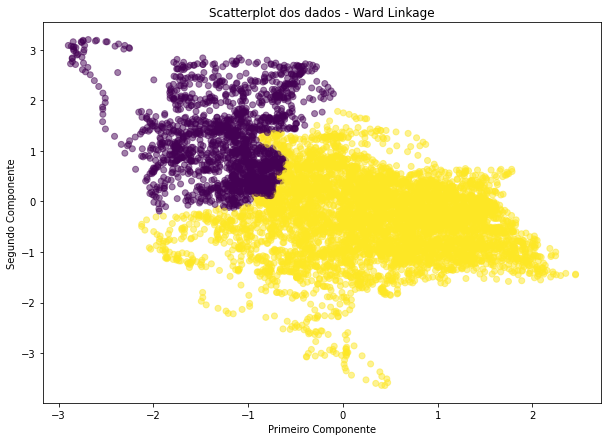

In [25]:
plt.figure(figsize=(10, 7))
plt.title('Scatterplot dos dados - Ward Linkage')
plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=cluster_complete, alpha=0.5)
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

In [26]:
distancias = sk_metrica.pairwise_distances(dados_pd_pca)

print("Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz")

db = []
ch = []
dn = []
sil = []

cortes = [80,60,50, 35, 30, 25, 24.1,22]

for k in range(2,10):
  f_clust = fcluster(linked, cortes[k-2], criterion='distance')
  db.append(sk_metrica.davies_bouldin_score(dados_pd_pca, f_clust))
  ch.append(sk_metrica.calinski_harabasz_score(dados_pd_pca, f_clust))
  dn.append(dunn(distancias, f_clust))
  sil.append(sk_metrica.silhouette_score(dados_pd_pca, f_clust))

Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz


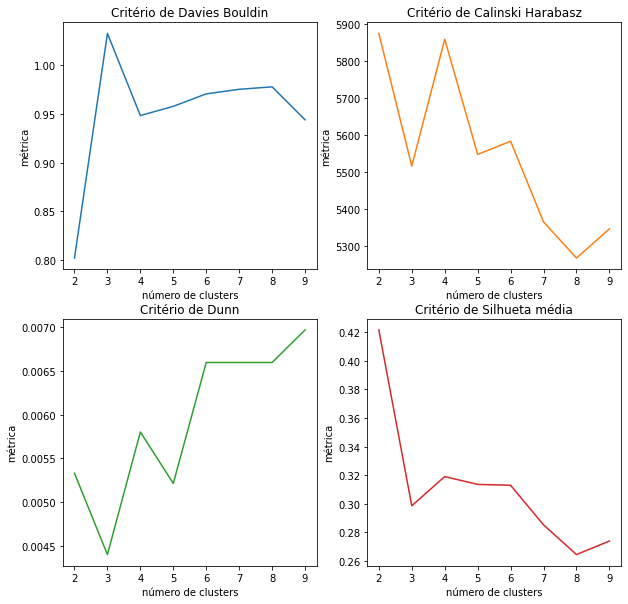

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

n_clust = [2,3,4,5,6,7,8,9]

axs[0, 0].plot(n_clust, db)
axs[0, 0].set_title('Critério de Davies Bouldin')
axs[0, 1].plot(n_clust, ch, 'tab:orange')
axs[0, 1].set_title('Critério de Calinski Harabasz')
axs[1, 0].plot(n_clust, dn, 'tab:green')
axs[1, 0].set_title('Critério de Dunn')
axs[1, 1].plot(n_clust, sil, 'tab:red')
axs[1, 1].set_title('Critério de Silhueta média')

for ax in axs.flat:
    ax.set(xlabel='número de clusters', ylabel='métrica')

# AVERAGE LINKAGE

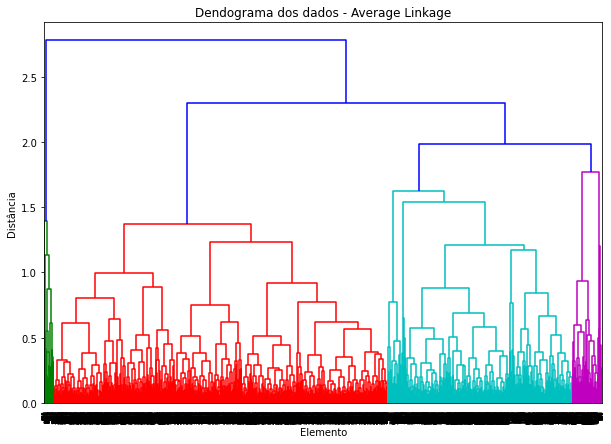

In [28]:
linked = linkage(dados_pd_pca, 'average')

#hierarchy.set_link_color_palette(['red','blue','green'])

plt.figure(figsize=(10, 7))
plt.title('Dendograma dos dados - Average Linkage')
plt.xlabel('Elemento')
plt.ylabel('Distância')
dendrogram(linked,
            orientation='top')
plt.show()

In [29]:
from scipy.cluster.hierarchy import fcluster

cluster_complete = fcluster(linked, 2, criterion='distance')

print(cluster_complete)

unicos = np.unique(cluster_complete)

print(unicos)

[3 3 3 ... 3 3 3]
[1 2 3]


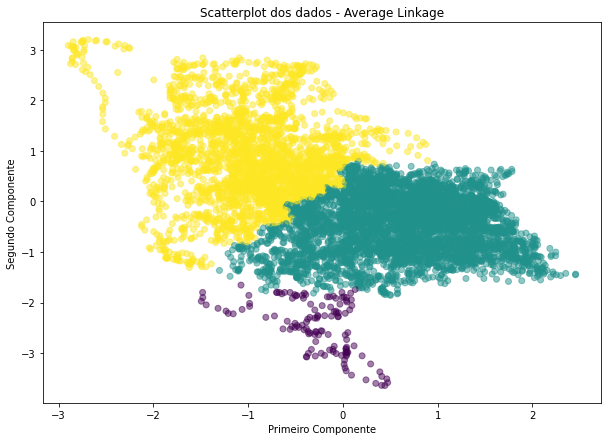

In [30]:
plt.figure(figsize=(10, 7))
plt.title('Scatterplot dos dados - Average Linkage')
plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=cluster_complete, alpha=0.5)
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

In [31]:
print("Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz")

db = []
ch = []
dn = []
sil = []

cortes = [2.5,2,1.9, 1.75, 1.6, 1.5, 1.37, 1.35]

for k in range(2,10):
  f_clust = fcluster(linked, cortes[k-2], criterion='distance')
  db.append(sk_metrica.davies_bouldin_score(dados_pd_pca, f_clust))
  ch.append(sk_metrica.calinski_harabasz_score(dados_pd_pca, f_clust))
  dn.append(dunn(distancias, f_clust))
  sil.append(sk_metrica.silhouette_score(dados_pd_pca, f_clust))

Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz


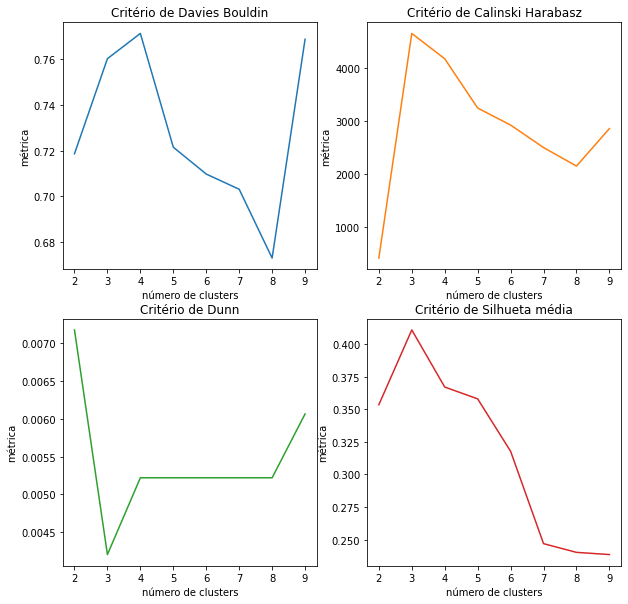

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

n_clust = [2,3,4,5,6,7,8,9]

axs[0, 0].plot(n_clust, db)
axs[0, 0].set_title('Critério de Davies Bouldin')
axs[0, 1].plot(n_clust, ch, 'tab:orange')
axs[0, 1].set_title('Critério de Calinski Harabasz')
axs[1, 0].plot(n_clust, dn, 'tab:green')
axs[1, 0].set_title('Critério de Dunn')
axs[1, 1].plot(n_clust, sil, 'tab:red')
axs[1, 1].set_title('Critério de Silhueta média')

for ax in axs.flat:
    ax.set(xlabel='número de clusters', ylabel='métrica')

#COMPLETE LINKAGE

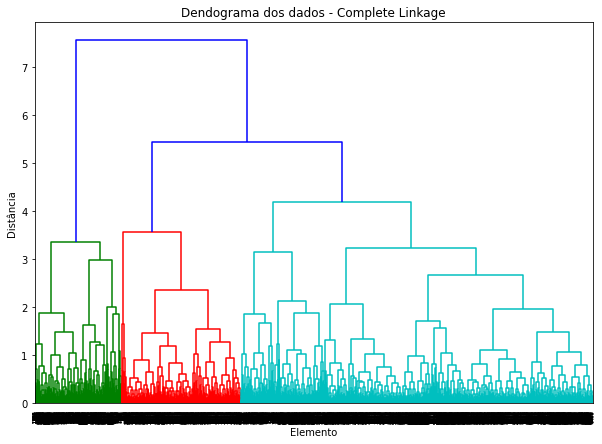

In [33]:
linked = linkage(dados_pd_pca, 'complete')

#hierarchy.set_link_color_palette(['red','blue','green'])

plt.figure(figsize=(10, 7))
plt.title('Dendograma dos dados - Complete Linkage')
plt.xlabel('Elemento')
plt.ylabel('Distância')
dendrogram(linked,
            orientation='top')
plt.show()

In [34]:
from scipy.cluster.hierarchy import fcluster

cluster_complete = fcluster(linked, 5, criterion='distance')

print(cluster_complete)

unicos = np.unique(cluster_complete)

print(unicos)

[1 1 1 ... 1 1 1]
[1 2 3]


In [35]:
print("Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz")

db = []
ch = []
dn = []
sil = []

cortes = [6, 5, 4, 3.5, 3.3, 3.15, 3.1, 2.9]

for k in range(2,10):
  f_clust = fcluster(linked, cortes[k-2], criterion='distance')
  db.append(sk_metrica.davies_bouldin_score(dados_pd_pca, f_clust))
  ch.append(sk_metrica.calinski_harabasz_score(dados_pd_pca, f_clust))
  dn.append(dunn(distancias, f_clust))
  sil.append(sk_metrica.silhouette_score(dados_pd_pca, f_clust))

Abaixo temos os critérios de Silhueta, DUNN, Davies-Bouldin e Calinski and Harabasz


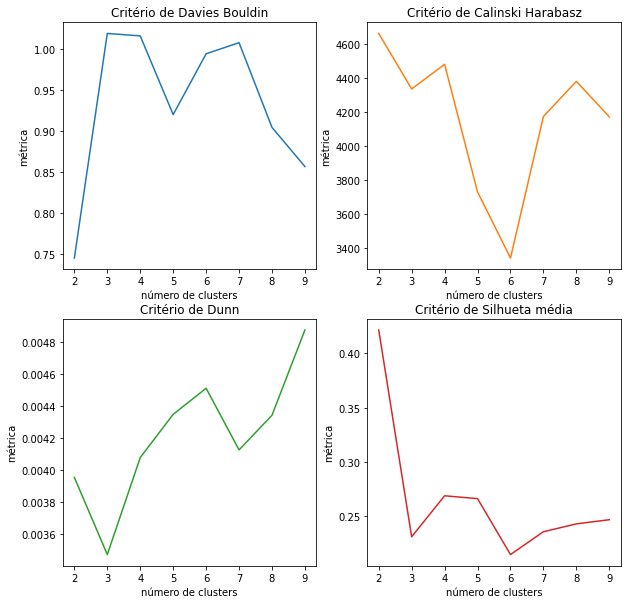

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

n_clust = [2,3,4,5,6,7,8,9]

axs[0, 0].plot(n_clust, db)
axs[0, 0].set_title('Critério de Davies Bouldin')
axs[0, 1].plot(n_clust, ch, 'tab:orange')
axs[0, 1].set_title('Critério de Calinski Harabasz')
axs[1, 0].plot(n_clust, dn, 'tab:green')
axs[1, 0].set_title('Critério de Dunn')
axs[1, 1].plot(n_clust, sil, 'tab:red')
axs[1, 1].set_title('Critério de Silhueta média')

for ax in axs.flat:
    ax.set(xlabel='número de clusters', ylabel='métrica')

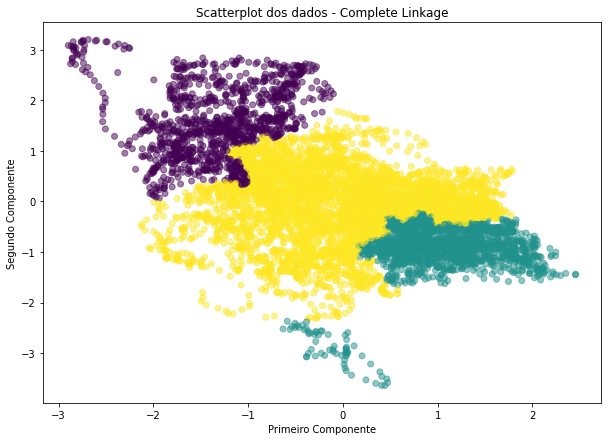

In [37]:
plt.figure(figsize=(10, 7))
plt.title('Scatterplot dos dados - Complete Linkage')
plt.scatter(dados_pd_pca.iloc[:,0], dados_pd_pca.iloc[:,1],c=cluster_complete, alpha=0.5)
plt.xlabel('Primeiro Componente')
plt.ylabel('Segundo Componente')
plt.show()

#DBSCAN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Estimated no. of clusters: 1


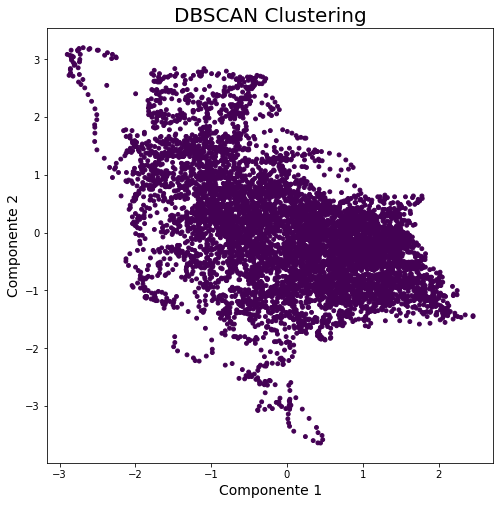

In [39]:
 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

## Padronizando

db_default = DBSCAN(eps=1, min_samples=10).fit(dados_pd_pca)
labels = list(db_default.labels_)

dados_acp_novo = dados_pd_pca
dados_acp_novo['labels'] = labels

no_clusters = len(np.unique(labels) )

print('Estimated no. of clusters: %d' % no_clusters)

plt.figure(figsize=(8,8))
plt.scatter(dados_acp_novo.iloc[:,0],dados_acp_novo.iloc[:,1],c=dados_acp_novo.iloc[:,2],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Componente 1',fontsize=14)
plt.ylabel('Componente 2',fontsize=14)
plt.show()



array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])